/var/folders/tx/h2c68l214n58r3162txr2h9w0000gn/T/ipykernel_31830/2786116783.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_yticklabels(['{:.0%}'.format(x) for x in vals], fontsize=16)
/var/folders/tx/h2c68l214n58r3162txr2h9w0000gn/T/ipykernel_31830/2786116783.py:75: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(['{:.0%}'.format(x) for x in vals], fontsize=16)
/var/folders/tx/h2c68l214n58r3162txr2h9w0000gn/T/ipykernel_31830/2786116783.py:77: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(vals, fontsize=16)
/var/folders/tx/h2c68l214n58r3162txr2h9w0000gn/T/ipykernel_31830/2786116783.py:79: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[3].set_yticklabels(['{:.0%}'.format(x) for x in vals], fontsize=16)


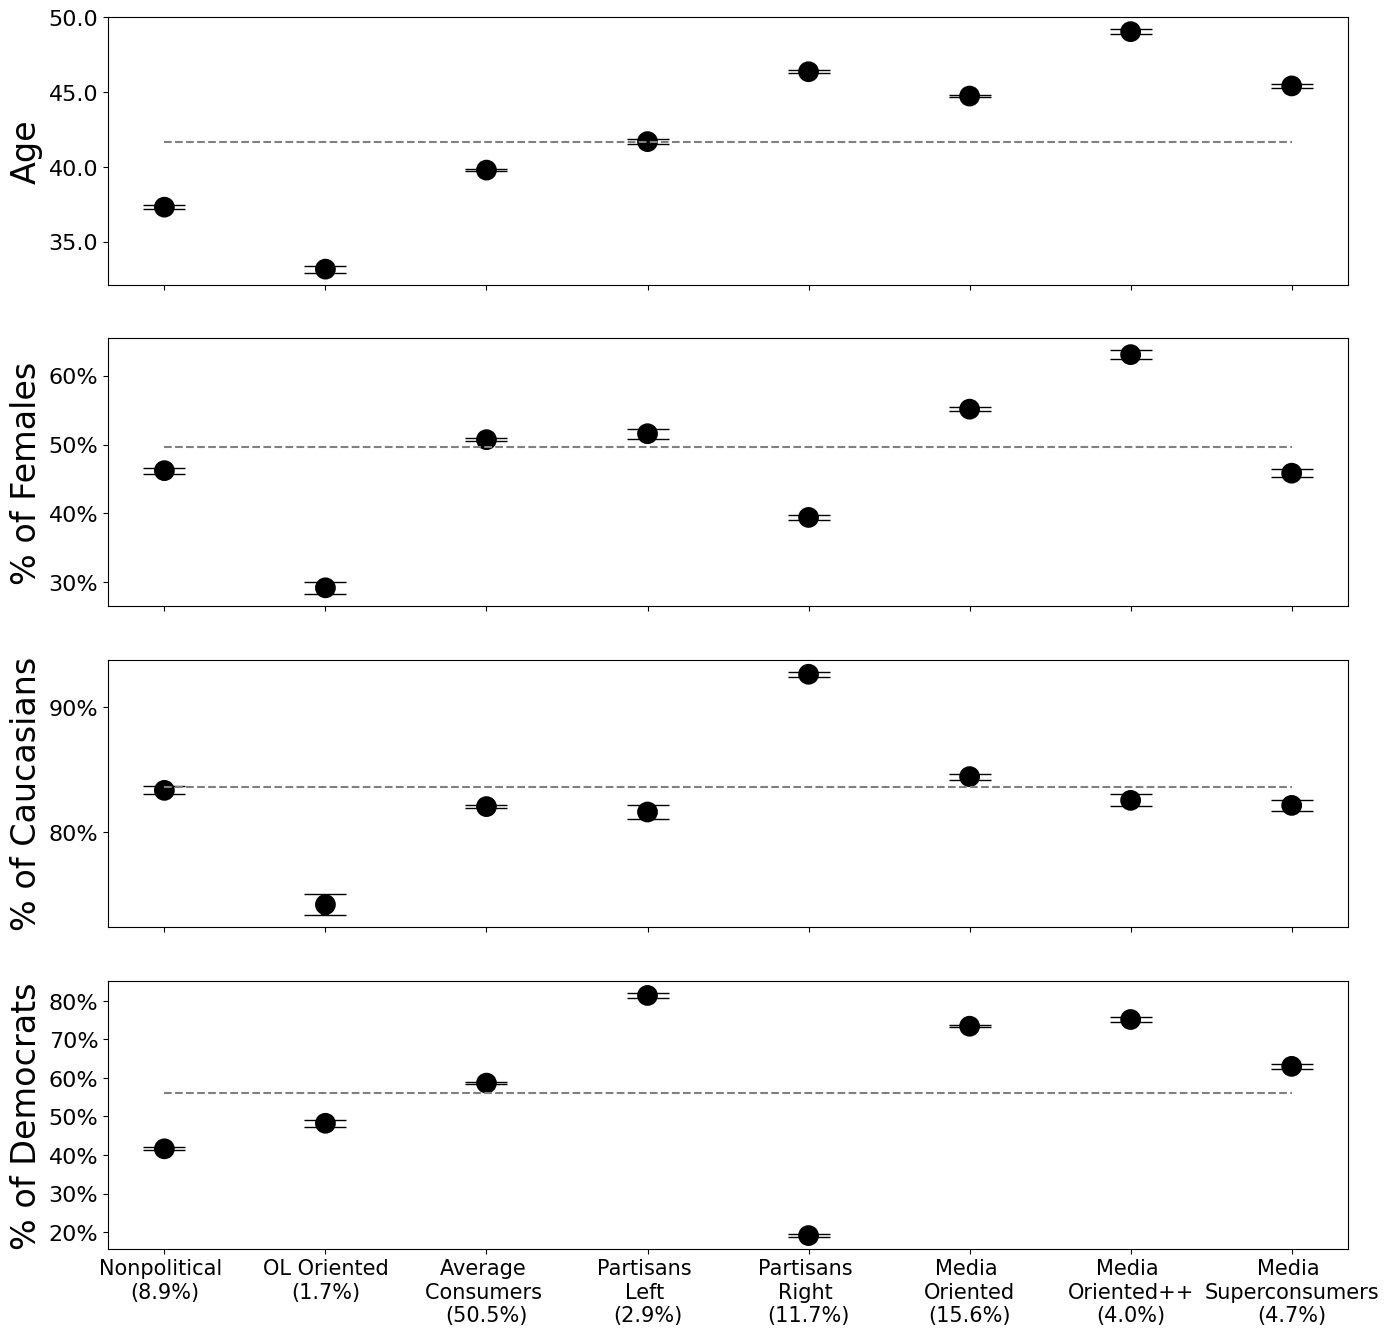

In [2]:
#==============================================================================
# 03-fig03-socio-demographic-characteristics
# Purpose: to replicate Figure 3 of the paper, in which we show the socio-
#          demographic charateristics among different political exposure
#          clusters.
# Article: "Who is Curating My Feed? Characterizing Political Exposure of
#          Registered U.S. Voters on Twitter"
# Year:    2022
# Authors: Assaf Shamir, Jennifer Oser, Nir Grinberg
#==============================================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

rename_detailed_dict = {
    0:"Nonpolitical \n(8.9%)",
    1:"OL Oriented\n(1.7%)",
    2:"Average \nConsumers \n(50.5%)",
    3.1:"Partisans \nLeft \n(2.9%)",
    3.2:"Partisans \nRight \n(11.7%)",
    4:"Media \nOriented\n(15.6%)",
    5:"Media \nOriented++\n(4.0%)",
    6:"Media \nSuperconsumers\n(4.7%)",
}

detailed_cluster_labels = list(rename_detailed_dict.values())

data = pd.read_csv("../data/03-fig03-socio-demographic-characteristics-summary.csv").drop(columns="Unnamed: 0")

df_mean_values = pd.read_csv('../data/03-fig03-socio-demographic-characteristics-means.csv')
race_mean, gender_mean, age_mean, party_mean = df_mean_values.Mean.values

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(16, 16))

sns.pointplot(data=data[data.column=="race_Caucasian"], x="cluster_detailed", y="mean", ax=ax[2], color="black", markers='o', linestyles='', scale = 1.7)#.sample(frac=0.1)
sns.pointplot(data=data[data.column=="gender_Female"], x="cluster_detailed", y="mean", ax=ax[1], color="black", markers='o', linestyles='', scale = 1.7)
sns.pointplot(data=data[data.column=="age"], x="cluster_detailed", y="mean", ax=ax[0], color="black", markers='o', linestyles='', scale = 1.7)
sns.pointplot(data=data[data.column=="party_score_Democrat"], x="cluster_detailed", y="mean", ax=ax[3], color="black", markers='o', linestyles='', scale = 1.7)

ax[2].errorbar(x=detailed_cluster_labels, y=data[data['column'] == 'race_Caucasian']["mean"], yerr=(data[data['column'] == 'race_Caucasian']["mean"]-data[data['column'] == 'race_Caucasian']["ci_lower"], data[data['column'] == 'race_Caucasian']["ci_upper"]-data[data['column'] == 'race_Caucasian']["mean"]), fmt='none', c='black', linewidth=6, capsize=15)
ax[1].errorbar(x=detailed_cluster_labels, y=data[data['column'] == 'gender_Female']["mean"], yerr=(data[data['column'] == 'gender_Female']["mean"]-data[data['column'] == 'gender_Female']["ci_lower"], data[data['column'] == 'gender_Female']["ci_upper"]-data[data['column'] == 'gender_Female']["mean"]), fmt='none', c='black', linewidth=6, capsize=15)
ax[0].errorbar(x=detailed_cluster_labels, y=data[data['column'] == 'age']["mean"], yerr=(data[data['column'] == 'age']["mean"]-data[data['column'] == 'age']["ci_lower"], data[data['column'] == 'age']["ci_upper"]-data[data['column'] == 'age']["mean"]), fmt='none', c='black', linewidth=6, capsize=15)
ax[3].errorbar(x=detailed_cluster_labels, y=data[data['column'] == 'party_score_Democrat']["mean"], yerr=(data[data['column'] == 'party_score_Democrat']["mean"]-data[data['column'] == 'party_score_Democrat']["ci_lower"], data[data['column'] == 'party_score_Democrat']["ci_upper"]-data[data['column'] == 'party_score_Democrat']["mean"]), fmt='none', c='black', linewidth=6, capsize=15)

ax[2].hlines(race_mean, 0, 7,  linestyle='dashed', color='grey')
ax[1].hlines(gender_mean, 0, 7,  linestyle='dashed', color='grey')
ax[0].hlines(age_mean, 0, 7,  linestyle='dashed', color='grey')
ax[3].hlines(party_mean, 0, 7,  linestyle='dashed', color='grey')

ax[2].set_xlabel(None)
ax[1].set_xlabel(None)
ax[0].set_xlabel(None)
ax[3].set_xlabel(None)

ax[2].set_ylabel("% of Caucasians", fontsize=24)
ax[1].set_ylabel("% of Females", fontsize=24)
ax[0].set_ylabel("Age", fontsize=24)
ax[3].set_ylabel("% of Democrats", fontsize=24)

ax[2].tick_params(axis='x', which='both', labelbottom=False)
ax[2].tick_params(axis='y', labelsize=22)
ax[1].tick_params(axis='x', which='both', labelbottom=False)
ax[1].tick_params(axis='y', labelsize=22)
ax[0].tick_params(axis='x', which='both', labelbottom=False)
ax[0].tick_params(axis='y', labelsize=22)
ax[3].set_xticklabels(detailed_cluster_labels, rotation = 0)
ax[3].tick_params(axis='x', which='major', labelsize=15)
ax[2].tick_params(axis='y', labelsize=22)

vals = ax[2].get_yticks()
ax[2].set_yticklabels(['{:.0%}'.format(x) for x in vals], fontsize=16)
vals = ax[1].get_yticks()
ax[1].set_yticklabels(['{:.0%}'.format(x) for x in vals], fontsize=16)
vals = ax[0].get_yticks()
ax[0].set_yticklabels(vals, fontsize=16)
vals = ax[3].get_yticks()
ax[3].set_yticklabels(['{:.0%}'.format(x) for x in vals], fontsize=16)

plt.show()